### Train/dev/test sets

Các hướng áp dụng ML cho các task khác nhau

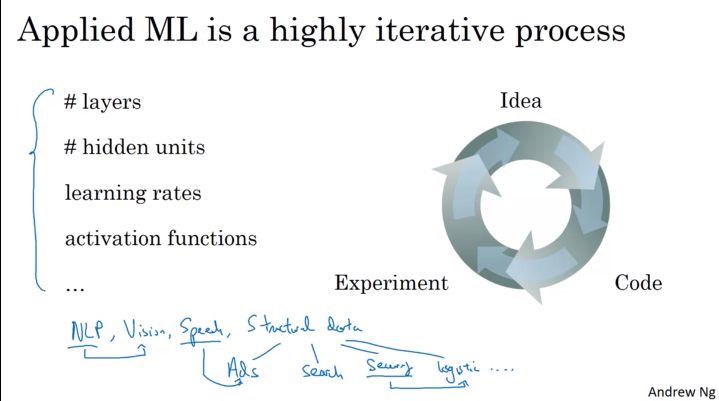

Theo truyền thống, ta có thể lấy tất cả dữ liệu bạn có và chia một phần của nó thành tập huấn luyện, một phần trong số đó làm tập hold-out cross validation set và  đôi khi còn được gọi là dev set (validation set) và 1 phần là test set.

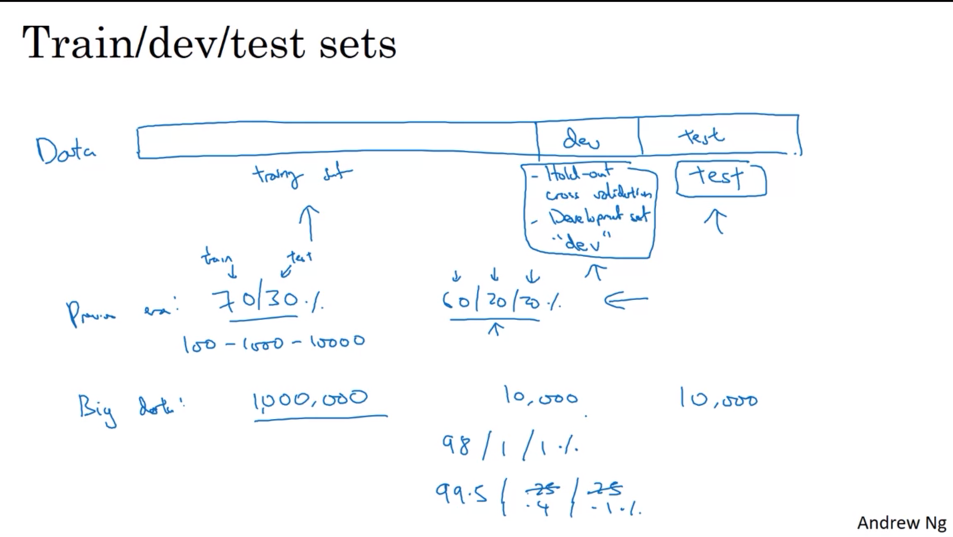

Trong kỷ nguyên học máy trước đây, thông lệ là lấy tất cả dữ liệu của bạn và chia theo tỷ lệ 70/30%. Nếu có dev set , ta có thể chia theo tỷ lệ 60/20/20%, xét về 60% train, 20% dev và 20% kiểm tra. Và vài năm trước, đây được coi là phương pháp hay nhất trong học máy

Trong kỷ Big data, dev và test set chiếm tỷ lệ phần trăm nhỏ hơn trong tổng số tập dữ liệu. Ví dụ: nếu bạn có một triệu ví dụ, bạn có thể cần 10.000 ví dụ cho nhóm phát triển của mình để đánh giá hai hoặc mười thuật toán khác nhau. Tỷ lệ này có thể thấp tới 1% của 1 triệu, thậm chí là 99,5% train và 0,25% dev, 0,25% test.

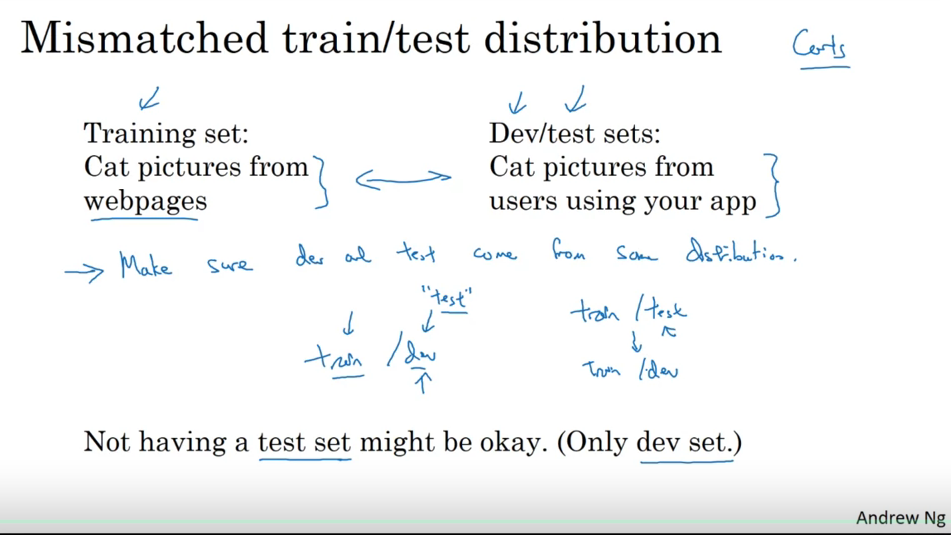

**Một xu hướng khác trong kỷ nguyên học sâu hiện đại là việc sử dụng mismatched train và test distributions được mô tả như trên**

### Bias/Variance

Điểm qua các lỗi về dữ liệu

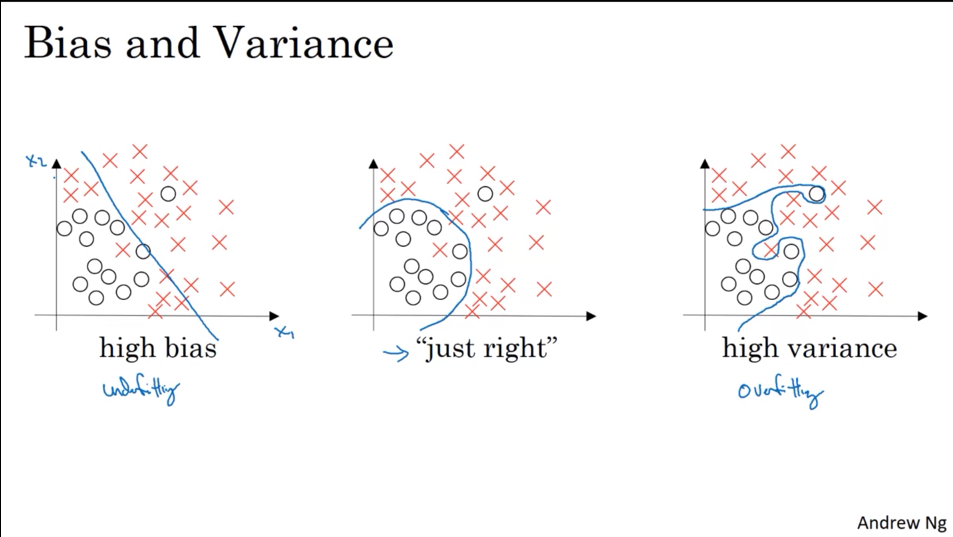

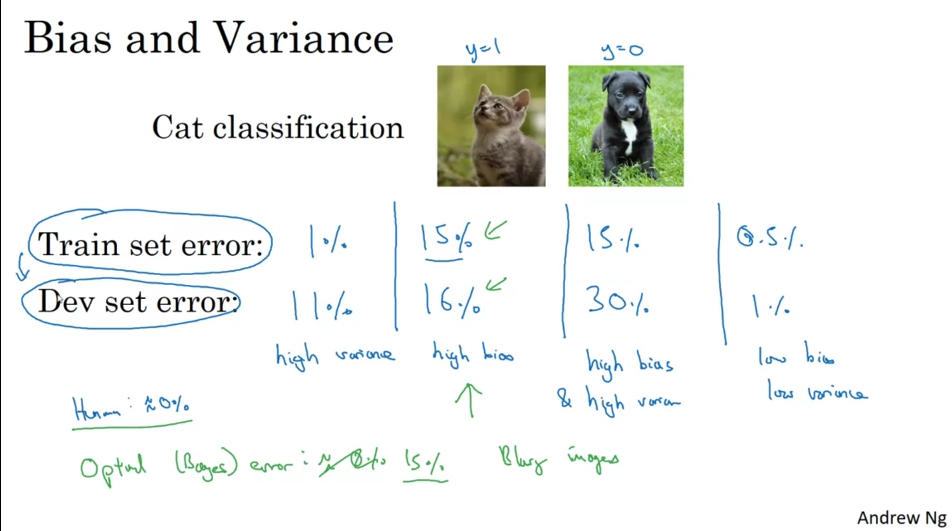

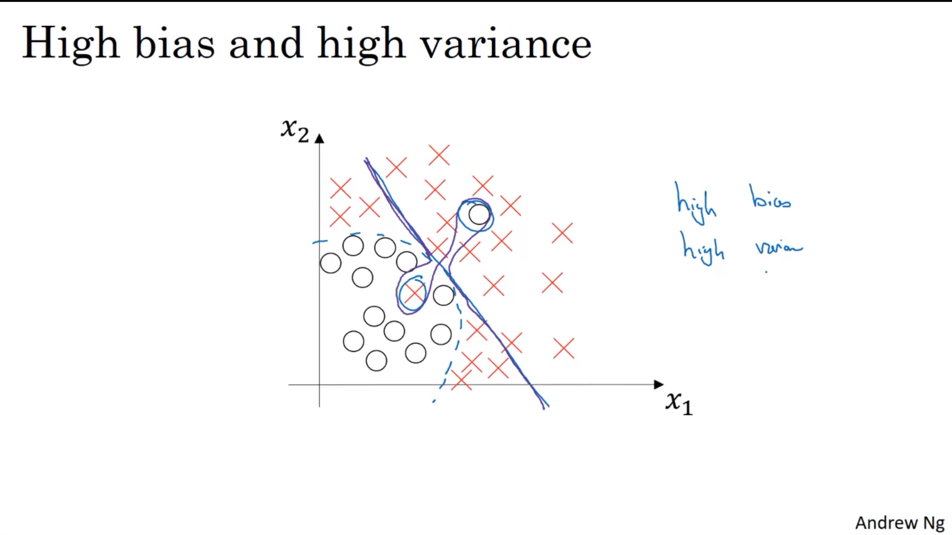

### Công thức cơ bản cho ML

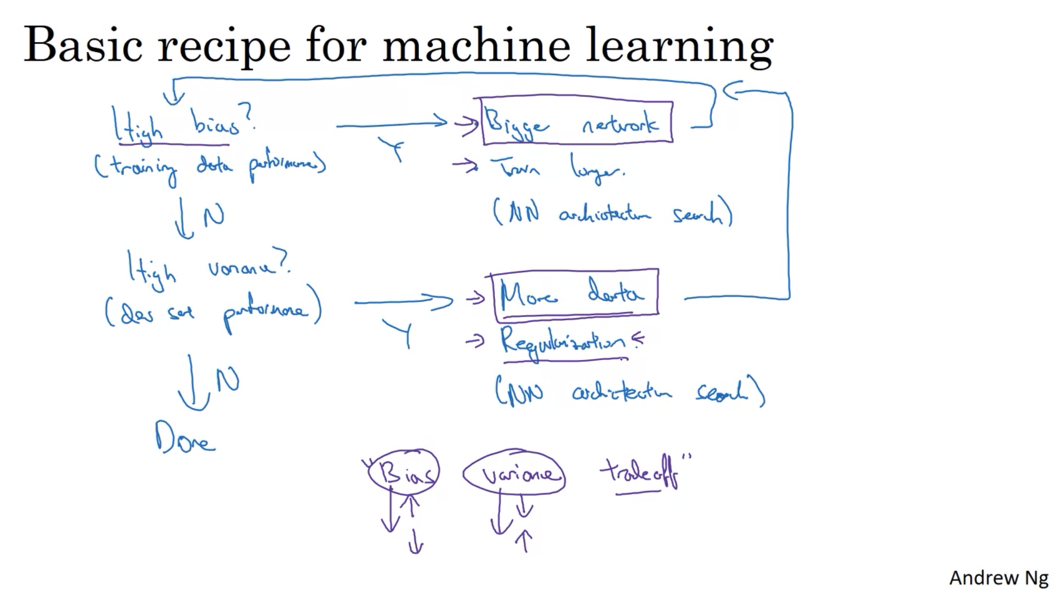

### Regularization (Phạt / penalty)

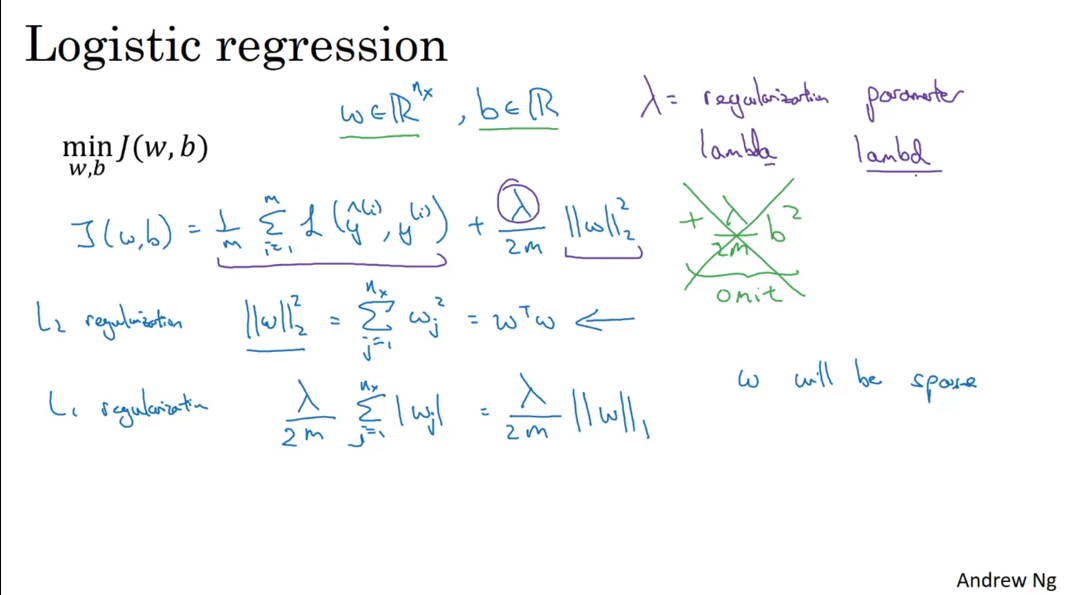

Trong ML, cụ thể là với Logistic Regression, khi regularization, ta sẽ có thêm một $\lambda$ để giảm giá trị của các tham số $\theta$.

Với L2 regularization (Gaussian), công thức sẽ là:

$$L2 = \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2 = \theta^{T} * \theta$$

Với L1 regularization (Laplacian), công thức sẽ là:

$$L1 = \frac{\lambda}{m} \sum_{j=1}^{n} |\theta_j|$$

Tại sao ở trong hình, L1 lại là 2m? 
- Bởi vì số 2 chỉ là một constant, không có cũng sẽ không ảnh hưởng tới việc tối ưu hóa.

Còn Tại sao lại không regularization cho $b$ (bias)?
- Trong thực tế, ta có thể làm điều đó nhưng việc này thường không được dùng nhiều vì $\theta$ thường là một vector nhiều chiều, đặc biệt là khi đối mặt với high variance, nhưng $b$ chỉ là một số vô hương. Vì thế các tham số chủ yếu sẽ tập trung vào $\theta$, và việc regularization cho $b$ sẽ không có ảnh hưởng tới kết quả

Công thức Frobenius norm:

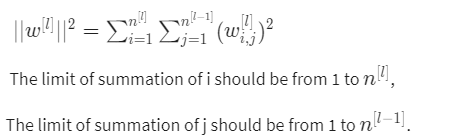

Trong hình dưới thứ tự bị ngược, và đây là cách chập nhật L2 regularization cho Neural Network:

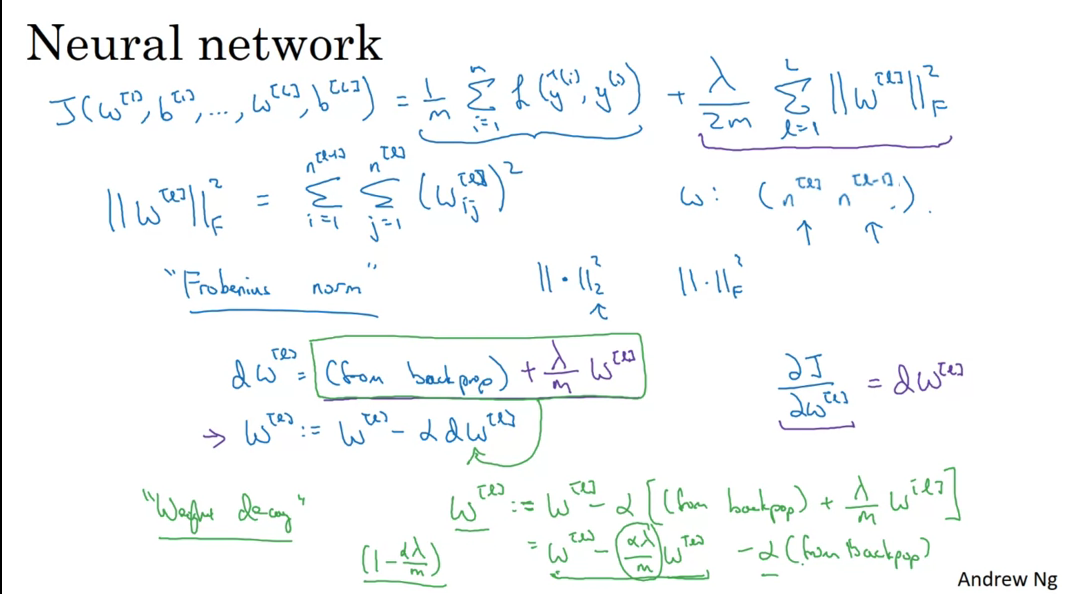

Về Lý do tại sao ta gọi gọi nó là Weight decay:
- Trong thực tế, việc regularization thường được gọi là weight decay, vì nó giảm giá trị của các tham số $\theta$. Như trong công thức xanh lá cây ở dưới, khi ta cập nhật $\theta$, ta sẽ trừ đi một lượng $\alpha * \lambda * \theta$. Và nó tương đương:

$$\theta * (1 - \frac{\alpha \lambda}{m}) \equiv \theta - \frac{\alpha \lambda}{m} * \theta$$

- Từ công thức trên, ta thấy được $\theta$ đang nhân với một số rất nhỏ, và nó giảm giá trị của $\theta$ đi một lượng.

### Dropout Regularization



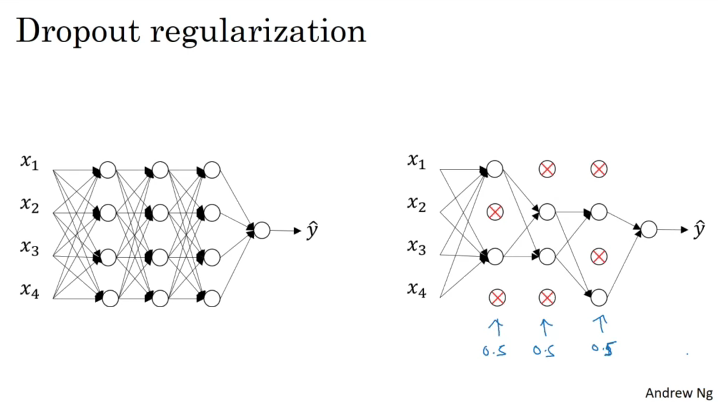

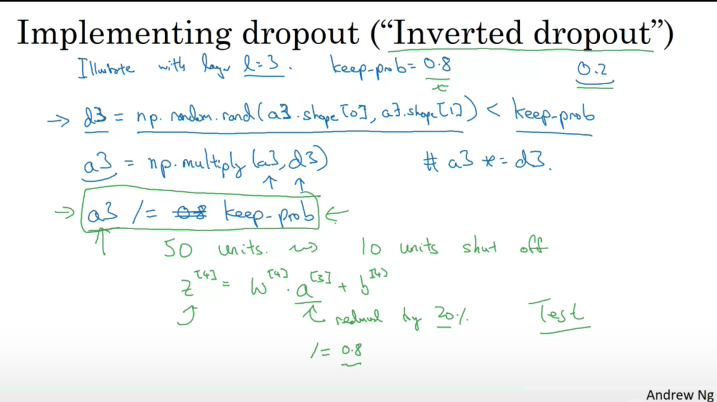

Trong hình trên, ta sử dụng kỹ thuật inverted dropout. Kỹ thuật này hoạt động ngược lại so với Dropout truyền thống. Thay vì bỏ ngẫu nhiên các neuron trong quá trình huấn luyện, Inverted Dropout thêm các giá trị nhiễu ngẫu nhiên vào các neuron.

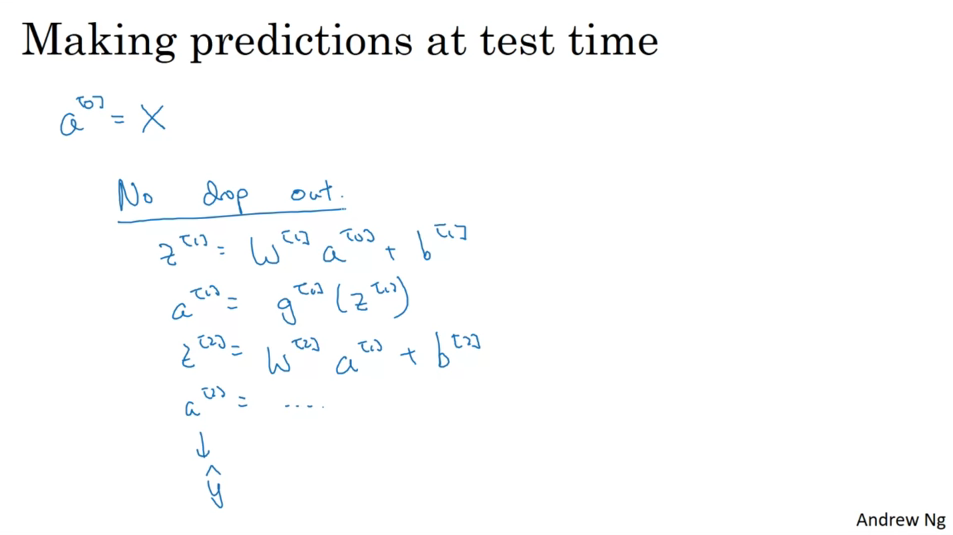

Ở quá trình test, ta sẽ không dropout

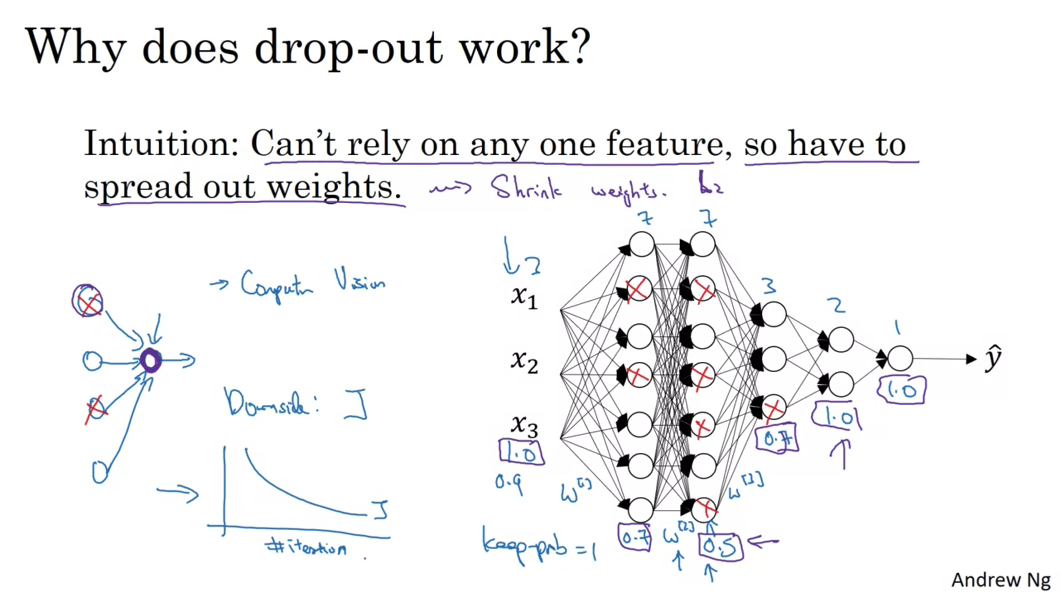

### Các kỹ thuật Regularization khác

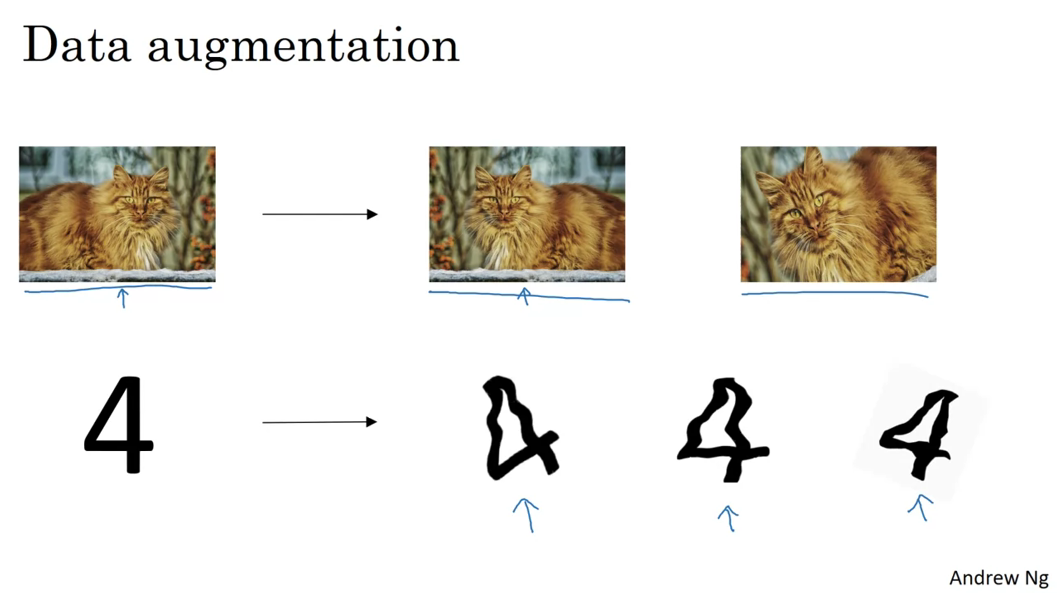

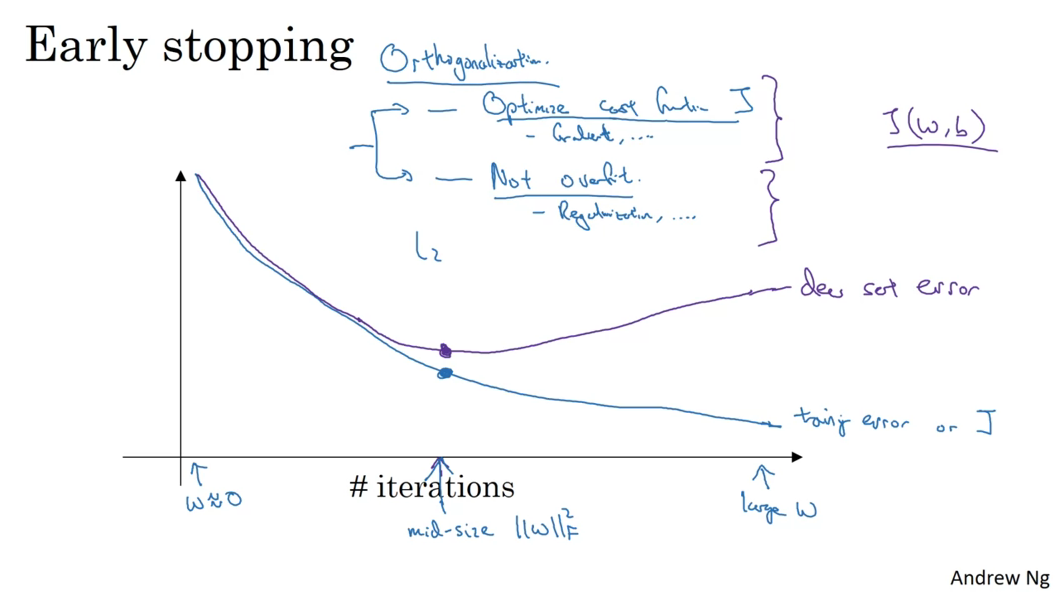

### Normalizing inputs

Các bước:
- Giá trị gốc trừ đi giá trị trung bình
- Chia cho độ lệch chuẩn

=> Ta sẽ được bộ dữ liệu có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1 và nằm trong khoảng [-1, 1]

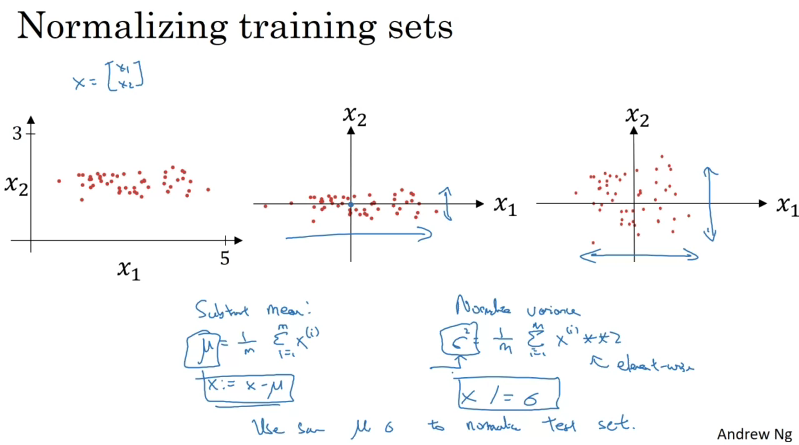

Tại sao lại cần normalize:
- Nó giúp giảm số lượng step cần thiết để tìm ra giá trị tối ưu
- Tính toán nhanh hơn

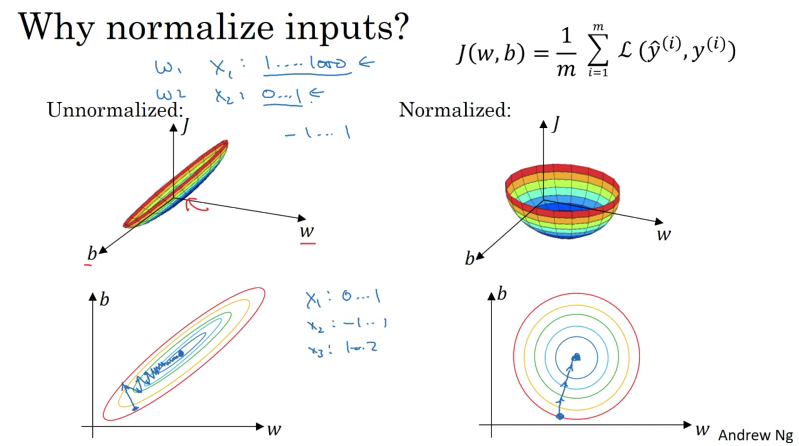

### Vanishing / Exploding gradients

Giả sử ta có một mạng DNN có hơn 10 lớp, ta sẽ giả dụ b = 0, thì lúc đó ta sẽ có:

$$\hat{y} = W^{[10]} * W^{[9]} * W^{[8]} * ... * W^{[1]} * x$$

Lúc đó, ta sẽ có:

$$Z^{[l]} = W^{[l]} * A^{[l-1]}$$

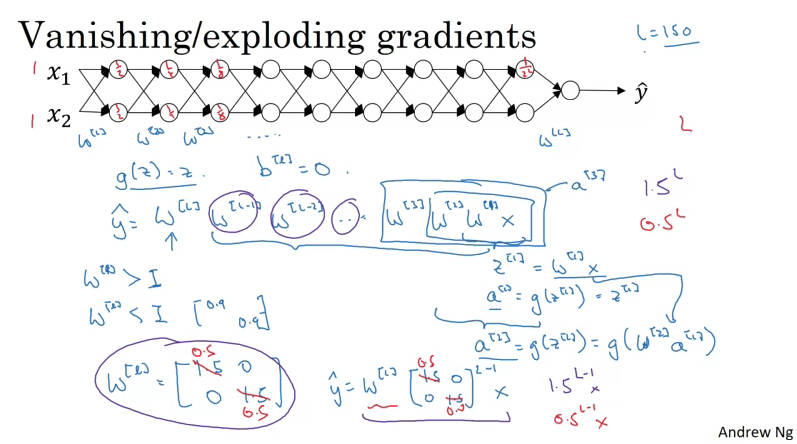

Tiếp tục, nếu $W^{l}$ kết quả sau phương trình trên của ta lớn hơn một chút:

$$W^{[l]} = \begin{bmatrix} 1.5 & 0 \\ 0 & 1.5 \end{bmatrix}$$

Thì $\hat{y}$ lúc này sẽ là:

$$\hat{y} = W^{[l]} * \begin{bmatrix} 1.5 & 0 \\ 0 & 1.5 \end{bmatrix}^{[l - 1]} * x$$

Từ đó ta thấy được, giá trị của $\hat{y}$ sẽ tăng lên một cách rất nhanh, và đây chính là hiện tượng ***Exploding gradients***.

Ngược lại nếu:

$$W^{[l]} = \begin{bmatrix} 0.5 & 0 \\ 0 & 0.5 \end{bmatrix}$$

Thì giá trị của $\hat{y}$ sẽ giảm đi một cách rất nhanh, và đây chính là hiện tượng ***Vanishing gradients***.

### Weight initialization cho DNN

Với mô hình có một lớp, ta có:

$$Z = W_1 * X_1 + W_2 * X_2 + ... + W_n * X_n + b$$

Tạm thời bỏ qua bias thì ta sẽ rất dễ nhận ra rằng, với một mô hình có càng nhiều giá trị, thì $W$ càng nhỏ, và ngược lại. Từ đó ta sẽ có cách dùng sau:
- Ta sẽ đặt $W$ ngẫu nhiên, nhưng thay vì nhân nó với $0.01$ như trước, thì ta sẽ nhân với $\sqrt{\frac{2}{n}}$ với $n$ là số lượng neuron trong lớp trước đó.

Vì thế, tham số $W$ sẽ không quá lớn hoặc quá nhỏ, và giúp tránh được hiện tượng Vanishing / Exploding gradients.
```python
W = np.random.randn(shape) * np.sqrt(2/n)
```

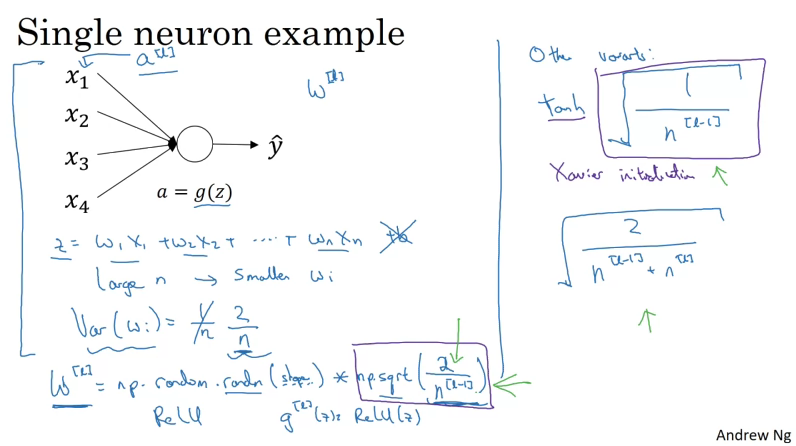

- Nếu dùng hàm tanh, ta sẽ nhân với $\sqrt{\frac{1}{n^{[l - 1]}}}$ thay vì $\sqrt{\frac{2}{n^{[l - 1]}}}$. Và nó còn được gọi là ***Xavier initialization***.

- Nếu dùng hàm ReLU, ta sẽ nhân với $\sqrt{\frac{2}{n^{[l - 1]}+ n^l}}$ thay vì $\sqrt{\frac{1}{n^{[l - 1]}}}$. Và nó còn được gọi là ***He initialization***.

### Numerical approximation of gradients

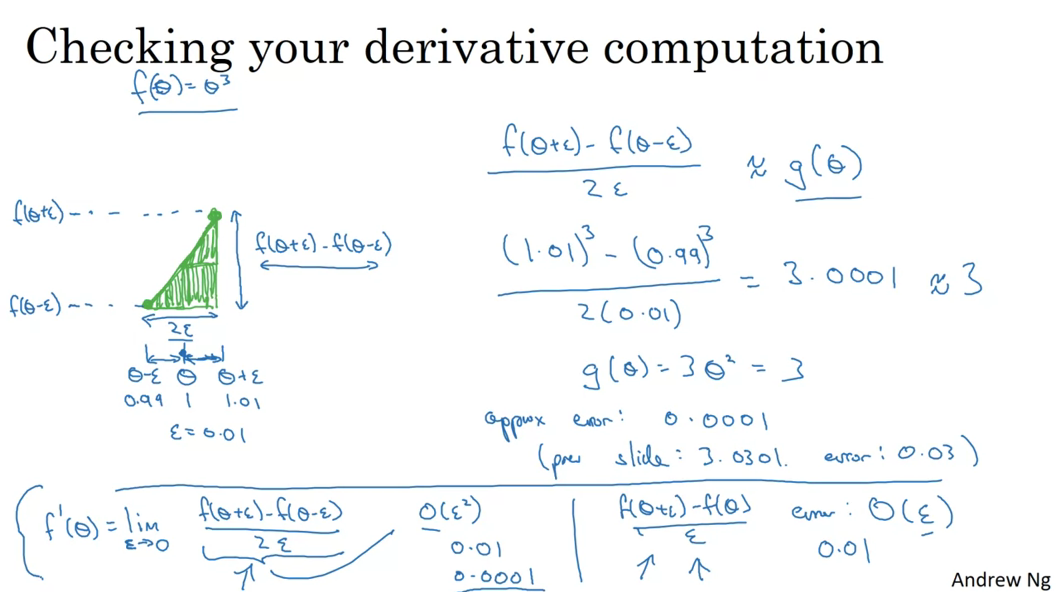

### Gradient Checking

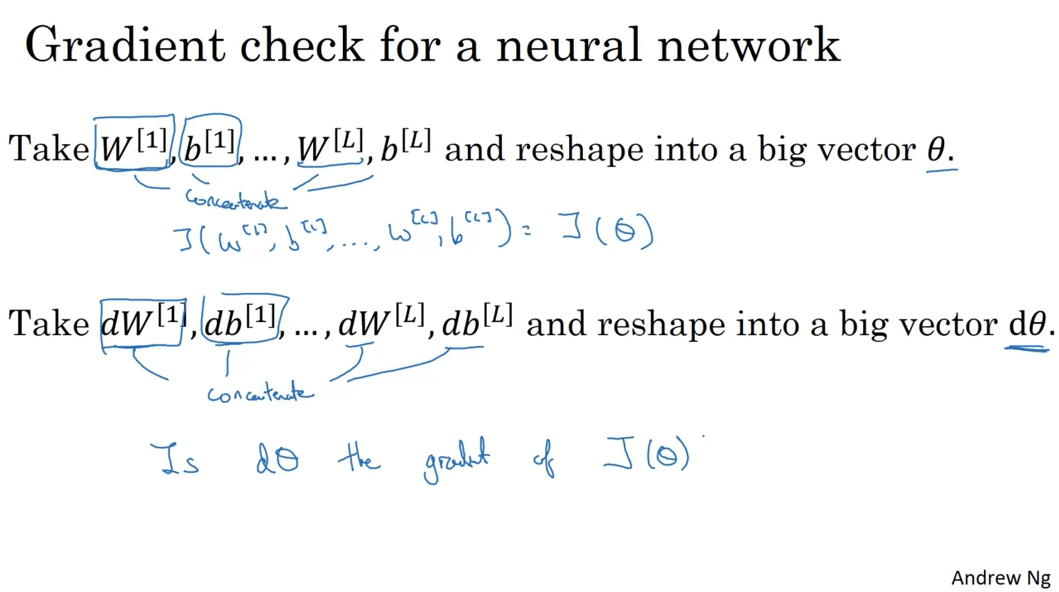

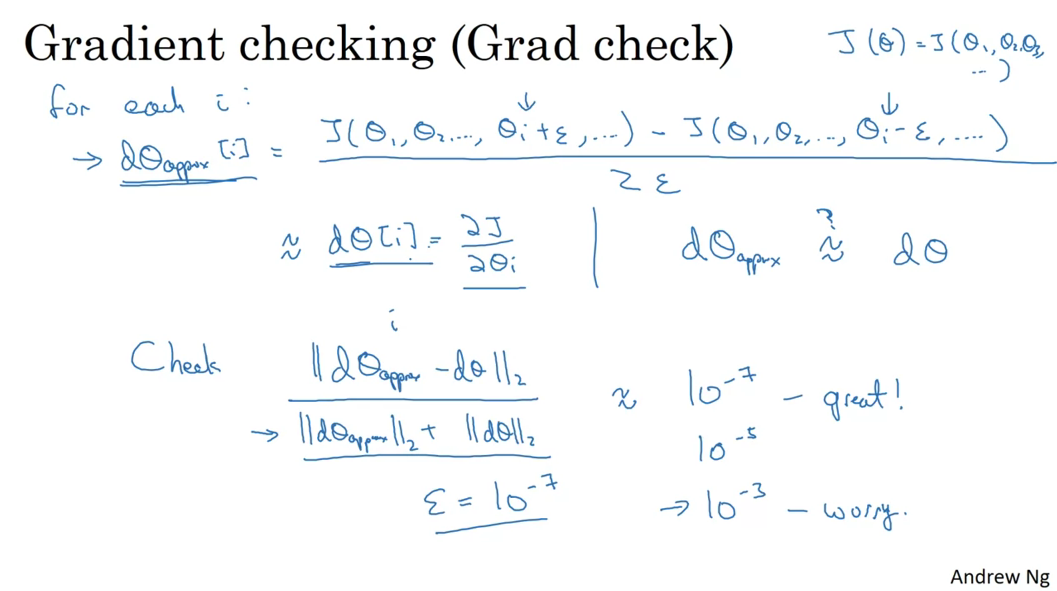

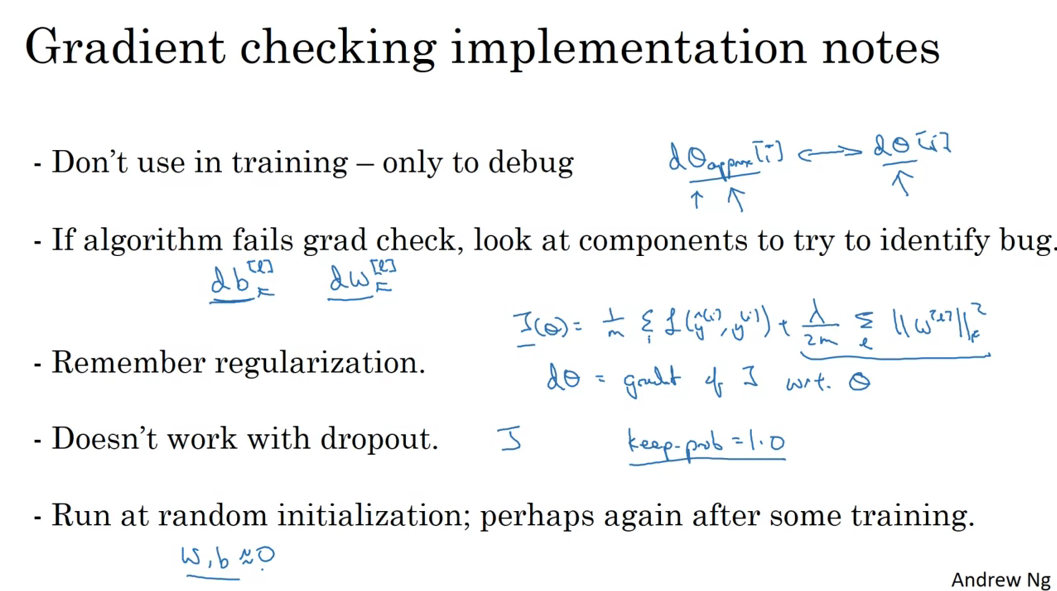